In [2]:
###################### start of code for checkpoint-1  ##########################

# Loading companies.txt and rounds2.csv into companies and rounds2 dataframes
import pandas as pd

companies = pd.read_csv(r"investment-assignment/companies.txt", encoding='ISO-8859-1', sep="\t")
companies.head()

rounds2 = pd.read_csv(r"investment-assignment/rounds2.csv", encoding='ISO-8859-1')
rounds2.head()


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [3]:
# cleaning the companies dataset
companies.info()
# count of missing values column-wise
companies.isnull().sum()
# percentage of missing values column-wise
round(100*(companies.isnull().sum()/len(companies.index)), 2)

# cleaning the columns which are relevant for our analysis
# identified category_list and country_code are the columns which are relevant for our analysis and needs cleaning
companies.dropna(subset=['category_list', 'country_code'], inplace=True)
companies.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


permalink            0
name                 1
homepage_url      3337
category_list        0
status               0
country_code         0
state_code        1536
region            1039
city              1037
founded_at       11276
dtype: int64

In [4]:
# cleaning the rounds2 dataset
rounds2.info()
rounds2.isnull().sum()
# percentage of missing values column-wise
round(100*(rounds2.isnull().sum()/len(rounds2.index)), 2)

# cleaning the columns which are relevant for our analysis
# identified raised_amount_usd is the column which is relevant for our analysis and needs cleaning
rounds2.dropna(subset=['raised_amount_usd'], inplace=True)
rounds2.isnull().sum()

# dropping the funding_round_code column as it has 70% missing values and also this column is not relevant for our analysis
rounds2.drop(['funding_round_code'], axis=1, inplace=True)
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 94959 entries, 0 to 114948
Data columns (total 5 columns):
company_permalink          94959 non-null object
funding_round_permalink    94959 non-null object
funding_round_type         94959 non-null object
funded_at                  94959 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(4)
memory usage: 4.3+ MB


In [5]:
# (1) how many unique companies are present in rounds2

# one way of finding unique values is using value_counts
len(rounds2.company_permalink.value_counts())

# other way of finding unique values is using unique() method
len(rounds2.company_permalink.unique())

73780

In [6]:
# (2) how many unique companies are present in companies file
# both the lines of below code will give same answer

len(companies.permalink.unique())
len(companies.permalink.value_counts())

57804

In [7]:
# (3) In the companies data frame, which column can be used as the  unique key for each company? Write the name of the column.
if len(companies.permalink.value_counts()) == companies.permalink.value_counts().sum():
    print("No duplicates in permalink column, hence can be used as unique key for each company")
# As there are no duplicates in permalink column, we can use it as a unique key for each company.

No duplicates in permalink column, hence can be used as unique key for each company


In [8]:
# (4) Are there any companies in the rounds2 file which are not  present in companies ? 

# converting all the values in permalink column to lowercase
companies['permalink'] = companies.permalink.str.lower()

# converting all the values in company_permalink column to lowercase
rounds2['company_permalink'] = rounds2.company_permalink.str.lower()

# number of companies present in rounds2 which are not present in companies dataframe
len(rounds2.loc[~rounds2['company_permalink'].isin(list(companies['permalink']))])

# Yes, there are companies in round2 file which are not present in companies file

6430

In [9]:

# merge companies and rounds2 data frames into master frame 
master_frame = pd.merge(companies, rounds2, how='inner', left_on='permalink', right_on='company_permalink')

# (5) Number of observations present in master frame
len(master_frame)


############## End of code for checkpoint-1  ###################

88529

In [10]:
###################### start of code for checkpoint-2 ############################

# converting all the values in funding_round_type column to lowercase
master_frame['funding_round_type'] = master_frame.funding_round_type.str.lower()

# (1) Average funding amount of venture type

# getting the list of rows from funding_round_type column whose type is venture
venture_fund_list = list((master_frame.funding_round_type == 'venture'))
venture_fund_mean = master_frame.raised_amount_usd[venture_fund_list].mean()

print(venture_fund_mean)

11724222.690204773


In [11]:
# (2) Average funding amount of angel type

# getting the list of rows from funding_round_type column whose type is angel
angel_fund_list = list((master_frame.funding_round_type == 'angel'))
angel_fund_mean = master_frame.loc[angel_fund_list, 'raised_amount_usd'].mean()

print(angel_fund_mean)

971573.8911363636


In [12]:
# (3) Average funding amount of seed type

# getting the list of rows from funding_round_type column whose type is seed
seed_fund_list = list((master_frame.funding_round_type == 'seed'))
seed_fund_mean = master_frame.loc[seed_fund_list, 'raised_amount_usd'].mean()

print(seed_fund_mean)

747793.6824840009


In [13]:
# (4) Average funding amount of private_equity type

# getting the list of rows from funding_round_type column whose type is private_equity
private_equity_fund_list = list((master_frame.funding_round_type == 'private_equity'))
private_equity_fund_mean = master_frame.loc[private_equity_fund_list, 'raised_amount_usd'].mean()

print(private_equity_fund_mean)

73938486.27527472


In [14]:
# (5) Considering that Spark Funds wants to invest between 5 to 15 million USD per investment round,
# which investment type is the most suitable for them?

if ((private_equity_fund_mean >= 5000000) and (private_equity_fund_mean <= 15000000)):
    print("private_equity_fund is suitable investment type")
elif ((seed_fund_mean >= 5000000) and (seed_fund_mean <= 15000000)):  
    print("seed_fund is suitable investment type")
elif ((venture_fund_mean >= 5000000) and (venture_fund_mean <= 15000000)):      
    print("venture_fund is suitable investment type")
elif ((angel_fund_mean >= 5000000) and (angel_fund_mean <= 15000000)):  
    print("angel_fund is suitable investment type")    


venture_fund is suitable investment type


In [15]:
# Making a copy of master_frame with all funding types before filtering by choosen funding type. 
# This dataframe will be used for plotting investment for all funding types
master_frame_with_all_funding_types = master_frame.copy()
master_frame_with_all_funding_types.head()


# filtering the data in master_frame so that it contains only the choosen investment type, which is venture type investment
master_frame = master_frame.loc[master_frame.funding_round_type == 'venture']
master_frame.head()

######################  End of code for checkpoint-2  ###########################

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
2,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
5,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0
7,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0
8,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0


In [16]:
###################### start of code for checkpoint-3 ############################

# grouping by country code
master_frame_by_country = master_frame.groupby('country_code')

# creating a data frame named top9 with the top nine countries based on the investment amount
top9 = pd.DataFrame(master_frame_by_country.raised_amount_usd.sum().sort_values(ascending=False))[:9]
# As English is not the official language in China, removing the row corresponding to China in top9 countries
top9 = top9[top9.index != 'CHN']
top9.head(10)

# Referred the following link provided by you to find countries with english as official language
# https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language

# (1) top english speaking country is USA

# As english is not the official language in china, i removed that row

# (2) second english speaking country is GBR
# (3) third english speaking country is IND

###################### end of code for checkpoint-3 ############################

,raised_amount_usd
country_code,
USA,4.200680e+11
GBR,2.007281e+10
IND,1.426151e+10
CAN,9.482218e+09
FRA,7.226851e+09
ISR,6.854350e+09
DEU,6.306922e+09
JPN,3.167647e+09


In [17]:
######################   start of code for checkpoint-4    ############################

# extracting the primary_sector(first sector before pipeline) from the category_list column and 
# storing it in a new column with name primary_sector
master_frame['primary_sector'] = master_frame.category_list.str.split("|").str[0]
master_frame[['category_list', 'primary_sector']].head()


,category_list,primary_sector
0,Media,Media
2,Curated Web,Curated Web
5,Biotechnology,Biotechnology
7,Analytics,Analytics
8,Analytics,Analytics


In [18]:
# creating mapping dataframe from mapping.csv file
mapping = pd.read_csv(r"investment-assignment/mapping.csv", encoding='ISO-8859-1')
mapping.head(20)

# cleaning the mapping dataframe
mapping.info()
mapping.isnull().sum()
# percentage of missing values column-wise
round(100*(mapping.isnull().sum()/len(mapping.index)), 2)

# cleaning the columns which are relevant for our analysis
# identified category_list is the column which are relevant for our analysis and needs cleaning
mapping.dropna(subset=['category_list'], inplace=True)
mapping.isnull().sum()

# as Blanks column has all values as zero, we can drop this column
mapping.drop(['Blanks'], axis=1, inplace=True)

mapping.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
category_list                              687 non-null object
Automotive & Sports                        688 non-null int64
Blanks                                     688 non-null int64
Cleantech / Semiconductors                 688 non-null int64
Entertainment                              688 non-null int64
Health                                     688 non-null int64
Manufacturing                              688 non-null int64
News, Search and Messaging                 688 non-null int64
Others                                     688 non-null int64
Social, Finance, Analytics, Advertising    688 non-null int64
dtypes: int64(9), object(1)
memory usage: 53.8+ KB


,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,1,0,0,0,0


In [19]:
# creating main_sector column in mapping dataframe by reversing one hot encoding
mapping['main_sector'] = pd.get_dummies(mapping).idxmax(1)
mapping.head(20)

# Renaming category_list in mapping dataframe to primary_sector
mapping['primary_sector'] = mapping[['category_list']]

# creating a new data frame with only two columns which are needed for merging with master_frame
new_mapping_df_with_two_columns = mapping[['primary_sector', 'main_sector']]
new_mapping_df_with_two_columns.head()


,primary_sector,main_sector
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
4,Accounting,"Social, Finance, Analytics, Advertising"
5,Active Lifestyle,Health


In [20]:
# merging master_frame and mapping dataframe by matching each primary_sector in master_frame to one of the 
# main_sectors in mapping dataframe
master_frame = pd.merge(master_frame, new_mapping_df_with_two_columns, how='inner', on='primary_sector')
master_frame.head()


######################   end of code for checkpoint-4    ############################

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media,Entertainment
1,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,Media,Entertainment
2,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,Media,Entertainment
3,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,Media,Entertainment
4,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,Media,Entertainment


In [21]:
######################   start of code for checkpoint-5    ############################

# (1) Creating dataframe for country = USA, FT = venture and investment range = 5 to 15 million
# in the below condition i'm not passing the funding type because master_frame is already filtered by venture funding type
analysis_investment_range = (master_frame.raised_amount_usd >= 5000000) & (master_frame.raised_amount_usd <= 15000000)

# Creating dataframe D1 for country code USA
D1 = master_frame.loc[(master_frame.country_code == 'USA') & analysis_investment_range]
D1.head()

# Creating dataframe D2 for country code GBR
D2 = master_frame.loc[(master_frame.country_code == 'GBR') & analysis_investment_range]
D2.head()

# Creating dataframe D3 for country code IND
D3 = master_frame.loc[(master_frame.country_code == 'IND') & analysis_investment_range]
D3.head()


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media,Entertainment
135,/organization/babajob,Babajob,http://www.babajob.com,Curated Web|Information Technology|Services|St...,operating,IND,19,Bangalore,Bangalore,27-08-2007,/organization/babajob,/funding-round/b72eaac5ea12ac0f50573ac3d6d46b8d,venture,28-04-2015,10000000.0,Curated Web,"News, Search and Messaging"
159,/organization/bharat-matrimony,Bharat Matrimony,http://www.bharatmatrimony.com,Curated Web|Match-Making,operating,IND,25,Chennai,Chennai,12-03-1969,/organization/bharat-matrimony,/funding-round/e37673bc7b0f1dfd3782f8f7abdb9ec8,venture,05-02-2008,11750000.0,Curated Web,"News, Search and Messaging"
190,/organization/bluestone-com,Bluestone.com,http://bluestone.com,Curated Web,operating,IND,19,Bangalore,Bangalore,01-01-2011,/organization/bluestone-com,/funding-round/452a7fc1f34df2d3dcda4e28234bc671,venture,24-01-2012,5000000.0,Curated Web,"News, Search and Messaging"
192,/organization/bluestone-com,Bluestone.com,http://bluestone.com,Curated Web,operating,IND,19,Bangalore,Bangalore,01-01-2011,/organization/bluestone-com,/funding-round/f5b252d6442ce231bb01586ca1821f63,venture,18-03-2014,10000000.0,Curated Web,"News, Search and Messaging"


In [22]:
# Adding the columns 'number_of_investments_per_main_sector' and 'total_amount_invested_per_main_sector' to the D1 dataframe

# creating a temp df with sum and count aggregate values after group by main_sector
investment_agg_per_main_sector_df = pd.DataFrame(D1.groupby('main_sector').raised_amount_usd.agg(['sum','count']))
investment_agg_per_main_sector_df.rename(columns={'sum':'total_amount_invested_per_main_sector',
                                                  'count' : 'number_of_investments_per_main_sector'}, inplace=True)

# Merging the temporary dataframe with D1 to add aggregation columns to D1 dataframe
D1 = pd.merge(D1, investment_agg_per_main_sector_df, how='inner', on='main_sector')

# Final D1 dataframe with all the required columns
D1.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector,total_amount_invested_per_main_sector,number_of_investments_per_main_sector
0,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,Media,Entertainment,5.000213e+09,580
1,/organization/chefs-feed,ChefsFeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,26-02-2015,5000000.0,Media,Entertainment,5.000213e+09,580
2,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,01-08-2006,5000000.0,Media,Entertainment,5.000213e+09,580
3,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,01-09-2007,5000000.0,Media,Entertainment,5.000213e+09,580
4,/organization/matchmine,MatchMine,http://matchmine.com,Media|News|Reviews and Recommendations,closed,USA,MA,Boston,Needham,01-01-2007,/organization/matchmine,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,01-09-2007,10000000.0,Media,Entertainment,5.000213e+09,580


In [23]:
# Adding the columns 'number_of_investments_per_main_sector' and 'total_amount_invested_per_main_sector' to the D2 dataframe

# creating a temp df with sum and count aggregate values after group by main_sector
investment_agg_per_main_sector_df = pd.DataFrame(D2.groupby('main_sector').raised_amount_usd.agg(['sum','count']))
investment_agg_per_main_sector_df.rename(columns={'sum':'total_amount_invested_per_main_sector',
                                                  'count' : 'number_of_investments_per_main_sector'}, inplace=True)

# Merging the temporary dataframe with D2 to add aggregation columns to D2 dataframe
D2 = pd.merge(D2, investment_agg_per_main_sector_df, how='inner', on='main_sector')

# Final D2 dataframe with all the required columns
D2.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector,total_amount_invested_per_main_sector,number_of_investments_per_main_sector
0,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,Media,Entertainment,461511059.0,54
1,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,Media,Entertainment,461511059.0,54
2,/organization/eutechnyx,Eutechnyx,http://press.eutechnyx.com,Games,operating,GBR,E5,Gateshead,Gateshead,01-01-1987,/organization/eutechnyx,/funding-round/d2fc787fbc5e4f468dff8b2c557993f1,venture,13-05-2010,8800000.0,Games,Entertainment,461511059.0,54
3,/organization/mind-candy,Mind Candy,http://www.mindcandy.com,Games,operating,GBR,H9,London,London,01-01-2003,/organization/mind-candy,/funding-round/47df01ed44d7b5916159051e5e32391e,venture,01-06-2011,10000000.0,Games,Entertainment,461511059.0,54
4,/organization/mind-candy,Mind Candy,http://www.mindcandy.com,Games,operating,GBR,H9,London,London,01-01-2003,/organization/mind-candy,/funding-round/c6a873b4cbdd7ea3d023a771bd3b2f99,venture,23-11-2006,10860000.0,Games,Entertainment,461511059.0,54


In [24]:
# Adding the columns 'number_of_investments_per_main_sector' and 'total_amount_invested_per_main_sector' to the D3 dataframe

# creating a temp df with sum and count aggregate values after group by main_sector
investment_agg_per_main_sector_df = pd.DataFrame(D3.groupby('main_sector').raised_amount_usd.agg(['sum','count']))
investment_agg_per_main_sector_df.rename(columns={'sum':'total_amount_invested_per_main_sector',
                                                  'count' : 'number_of_investments_per_main_sector'}, inplace=True)

# Merging the temporary dataframe with D3 to add aggregation columns to D3 dataframe
D3 = pd.merge(D3, investment_agg_per_main_sector_df, how='inner', on='main_sector')

# Final D3 dataframe with all the required columns
D3.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector,total_amount_invested_per_main_sector,number_of_investments_per_main_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media,Entertainment,280830000.0,33
1,/organization/dhruva,Dhruva,http://www.dhruva.com/,Games,operating,IND,19,Bangalore,Bangalore,01-01-1997,/organization/dhruva,/funding-round/6035248811c9530b11bd442d9239a0b1,venture,27-11-2006,5000000.0,Games,Entertainment,280830000.0,33
2,/organization/games2win,Games2Win,http://www.games2win.com,Games,operating,IND,16,Mumbai,Mumbai,01-01-2005,/organization/games2win,/funding-round/6b024f4906c288c66d1df966e6aeb256,venture,29-03-2007,5000000.0,Games,Entertainment,280830000.0,33
3,/organization/games2win,Games2Win,http://www.games2win.com,Games,operating,IND,16,Mumbai,Mumbai,01-01-2005,/organization/games2win,/funding-round/b095563fd43d1e4fd16da3f4bcd040af,venture,30-03-2011,6000000.0,Games,Entertainment,280830000.0,33
4,/organization/pokkt,POKKT,http://www.pokkt.com,Games,operating,IND,16,Mumbai,Mumbai,01-08-2012,/organization/pokkt,/funding-round/adb94c131e001a7438a4695d873d8dc1,venture,03-11-2015,5000000.0,Games,Entertainment,280830000.0,33


In [25]:
# (1) Total number of Investments (count)

print("Number of investmenst in D1 = ",D1.groupby('main_sector').raised_amount_usd.count().sum())
print("Number of investmenst in D2  = ",D2.groupby('main_sector').raised_amount_usd.count().sum())
print("Number of investmenst in D3  = ",D3.groupby('main_sector').raised_amount_usd.count().sum())

Number of investmenst in D1 =  11149
Number of investmenst in D2  =  577
Number of investmenst in D3  =  299


In [26]:
# (2) Total amount of investment (USD))

print("Total amount of investmenst in D1 = ",D1.groupby('main_sector').raised_amount_usd.sum().sum())
print("Total amount of investmenst in D2  = ",D2.groupby('main_sector').raised_amount_usd.sum().sum())
print("Total amount of investmenst in D3  = ",D3.groupby('main_sector').raised_amount_usd.sum().sum())

Total amount of investmenst in D1 =  99661524549.0
Total amount of investmenst in D2  =  5028704358.0
Total amount of investmenst in D3  =  2683537552.0


In [27]:
# (3) Top Sector name (no. of investment-wise)

print("Top Sector name in D1 = ", D1.loc[D1['number_of_investments_per_main_sector'].idxmax(), 'main_sector'])
print("Top Sector name in D2  = ", D2.loc[D2['number_of_investments_per_main_sector'].idxmax(), 'main_sector'])
print("Top Sector name in D3  = ", D3.loc[D3['number_of_investments_per_main_sector'].idxmax(), 'main_sector'])

Top Sector name in D1 =  Others
Top Sector name in D2  =  Others
Top Sector name in D3  =  Others


In [28]:
# (4) Second Sector name (no. of investment-wise)

# using the below line of code we can find the second highest number of investments in D1 = 2297
D1.number_of_investments_per_main_sector.value_counts().sort_values(ascending=False)  
# using the below line of code we can find the second highest number of investments in D2 = 127 
D2.number_of_investments_per_main_sector.value_counts().sort_values(ascending=False)
# using the below line of code we can find the second highest number of investments in D3 = 52
D3.number_of_investments_per_main_sector.value_counts().sort_values(ascending=False)

print("Second Sector name in D1 = ", D1.loc[D1.number_of_investments_per_main_sector == 2297,'main_sector'].unique())
print("Second Sector name in D2  = ", D2.loc[D2.number_of_investments_per_main_sector == 127,'main_sector'].unique())
print("Second Sector name in D3  = ", D3.loc[D3.number_of_investments_per_main_sector == 52,'main_sector'].unique())

Second Sector name in D1 =  ['Cleantech / Semiconductors']
Second Sector name in D2  =  ['Cleantech / Semiconductors']
Second Sector name in D3  =  ['News, Search and Messaging']


In [29]:
# (5) Third Sector name (no. of investment-wise)

# using the below line of code we can find the third highest number of investments in D1 = 1912
D1.number_of_investments_per_main_sector.value_counts().sort_values(ascending=False)  
# using the below line of code we can find the third highest number of investments in D2 = 98 
D2.number_of_investments_per_main_sector.value_counts().sort_values(ascending=False)
# using the below line of code we can find the third highest number of investments in D3 = 33
D3.number_of_investments_per_main_sector.value_counts().sort_values(ascending=False)

print("Third Sector name in D1 = ", D1.loc[D1.number_of_investments_per_main_sector == 1912,'main_sector'].unique())
print("Third Sector name in D2  = ", D2.loc[D2.number_of_investments_per_main_sector == 98,'main_sector'].unique())
print("Third Sector name in D3  = ", D3.loc[D3.number_of_investments_per_main_sector == 33,'main_sector'].unique())

Third Sector name in D1 =  ['Social, Finance, Analytics, Advertising']
Third Sector name in D2  =  ['Social, Finance, Analytics, Advertising']
Third Sector name in D3  =  ['Entertainment']


In [30]:
# (6) Number of investments in top sector (3)
# (7) Number of investments in second sector (4)
# (8) Number of investments in third sector (5)

# using the below line of code we can identify the number of investments in top sector, second sector and third sector in D1
print(D1.number_of_investments_per_main_sector.value_counts().sort_values(ascending=False))
# using the below line of code we can identify the number of investments in top sector, second sector and third sector in D2
print(D2.number_of_investments_per_main_sector.value_counts().sort_values(ascending=False))
# using the below line of code we can identify the number of investments in top sector, second sector and third sector in D3
print(D3.number_of_investments_per_main_sector.value_counts().sort_values(ascending=False))

2923    2923
2297    2297
1912    1912
1563    1563
908      908
799      799
580      580
167      167
Name: number_of_investments_per_main_sector, dtype: int64
143    143
127    127
98      98
73      73
54      54
42      42
24      24
16      16
Name: number_of_investments_per_main_sector, dtype: int64
109    109
52      52
33      33
32      32
21      21
20      20
19      19
13      13
Name: number_of_investments_per_main_sector, dtype: int64


In [31]:
# (9) For point 3 (top sector count-wise), which company received the highest investments
# we already identified that 'Others' is the top sector number of investments wise in all the three dataframes D1, D2, D3
print(D1.loc[D1.loc[D1.main_sector == 'Others'].raised_amount_usd.idxmax(), 'name'])
print(D2.loc[D2.loc[D2.main_sector == 'Others'].raised_amount_usd.idxmax(), 'name'])
print(D3.loc[D3.loc[D3.main_sector == 'Others'].raised_amount_usd.idxmax(), 'name'])

Change Healthcare
Azure Solutions
ZO Rooms


In [32]:
# (10) For point 4 (second best sector count-wise), which company received the highest investment?
# we already identified that 'Cleantech / Semiconductors' is the top sector number of investments wise in dataframes D1, D2
print(D1.loc[D1.loc[D1.main_sector == 'Cleantech / Semiconductors'].raised_amount_usd.idxmax(), 'name'])
print(D2.loc[D2.loc[D2.main_sector == 'Cleantech / Semiconductors'].raised_amount_usd.idxmax(), 'name'])
# we already identified that 'News, Search and Messaging' is the second top sector number of investments wise in dataframes D3
print(D3.loc[D3.loc[D3.main_sector == 'News, Search and Messaging'].raised_amount_usd.idxmax(), 'name'])


######################   end of code for checkpoint-5    ############################

480 Biomedical
Anadigm
Mobile2Win India


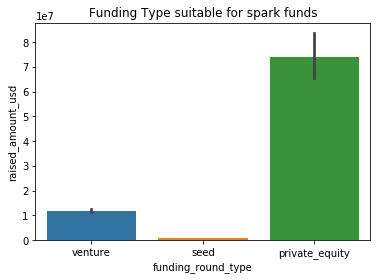

In [38]:
######################   start of code for checkpoint-6    ############################
import matplotlib.pyplot as plt
import seaborn as sns

# (1) A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the 
# average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) 
# is best suited for Spark Funds.
df_for_FT_plot = master_frame_with_all_funding_types.loc[
    master_frame_with_all_funding_types.funding_round_type.isin(['venture','seed','private_equity'])]

sns.barplot(x='funding_round_type', y='raised_amount_usd', data=df_for_FT_plot)
plt.title('Funding Type suitable for spark funds')
plt.show()


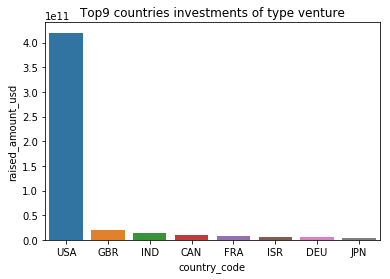

In [34]:
# (2) A plot showing the top 9 countries against the total amount of investments of funding type FT. 
# This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

sns.barplot(x=top9.index, y='raised_amount_usd', data=top9)
plt.title('Top9 countries investments of type venture')
plt.show()


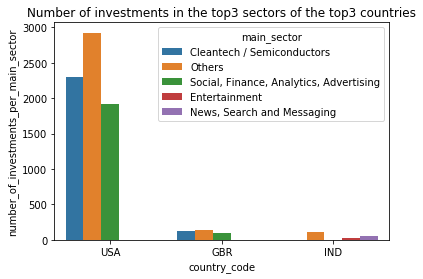

In [39]:
# (3) A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart 
# (for the chosen investment type FT). 

# filter the top3 sectors in D1
D1_plot = D1.loc[D1.main_sector.isin(['Others', 'Cleantech / Semiconductors', 'Social, Finance, Analytics, Advertising'])]

# filter the top3 sectors in D2
D2_plot = D2.loc[D2.main_sector.isin(['Others', 'Cleantech / Semiconductors', 'Social, Finance, Analytics, Advertising'])]

# filter the top3 sectors in D3
D3_plot = D3.loc[D3.main_sector.isin(['Others', 'News, Search and Messaging', 'Entertainment'])]

# concat D1, D2 and D3 into a single dataframe
df_for_plot3 = pd.concat([D1_plot, D2_plot, D3_plot])
df_for_plot3.head()

sns.barplot(x='country_code', y='number_of_investments_per_main_sector', hue='main_sector', data=df_for_plot3)
plt.title('Number of investments in the top3 sectors of the top3 countries')
plt.show()


######################   end of code for checkpoint-6    ############################